## Iris data explore
### In this tutorial, we will go through some commonly seen plot methods and explain functionailty of each plot method and following analysis can be done with this plot.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data =pd.read_csv('iris.csv')

In [3]:
# a glimpse on the dataset
print (data.shape)
data.head()


(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check the target type distribtion, fairly even spaced
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
import matplotlib.pyplot as plt

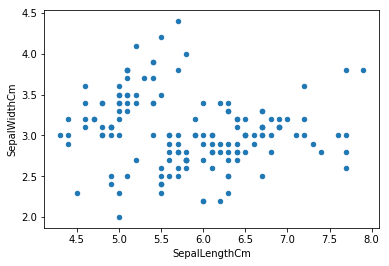

In [6]:
# pandas has handy plot method, we can use that
data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

### what if you want visualize all three types with different colors?

C:\anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


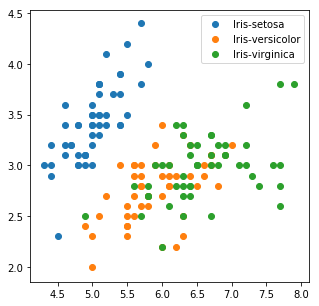

In [14]:
# method one:
fig = plt.figure(1,figsize=(5,5))
# colors = ['r','b','g']
for i in data.Species.unique():
    plt.scatter(x=data[data.Species==i].SepalLengthCm.values,y=data[data.Species==i].SepalWidthCm.values)
    
plt.legend(data.Species.unique(),loc=0)

fig.show()

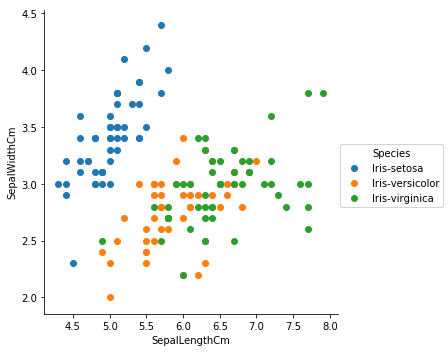

In [15]:
# method two
# seaborn which is built upon matplotlib has a more concise method to do that.
import seaborn as sns
sns.FacetGrid(data,hue='Species',size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()


### why boxplot?

#### boxplot is a nice visualization method of range of specific attribute in each class

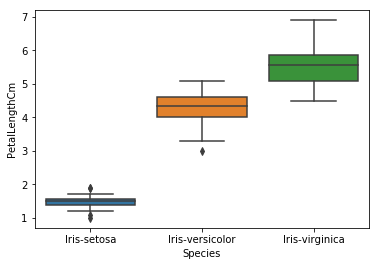

In [30]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)

#### From the figure we can easily observe the range of PetalLength(cm) of each class 
We could do simialy plotting for each attribute

In [39]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

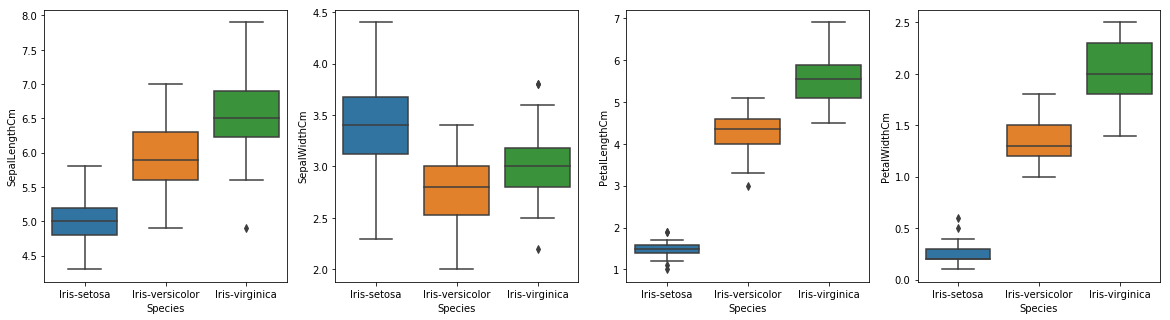

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(141)
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
plt.subplot(142)
sns.boxplot(x="Species", y="SepalWidthCm", data=data)
plt.subplot(143)
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.subplot(144)
sns.boxplot(x="Species", y="PetalWidthCm", data=data)

In [53]:
data.drop('Id',axis=1).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D8FEF3A58>,
      dtype=object)

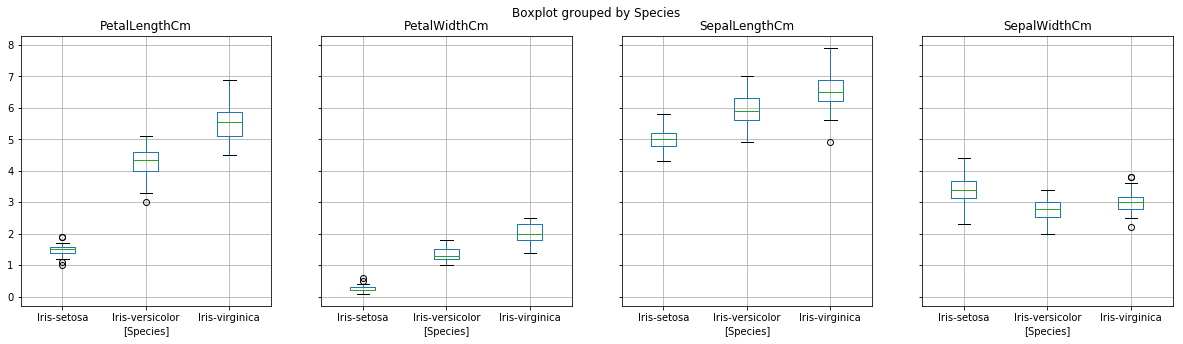

In [52]:
# handy version... powerful pandas!!
data.drop('Id',axis=1).boxplot(by='Species',figsize=(20,5),layout=(1,4))

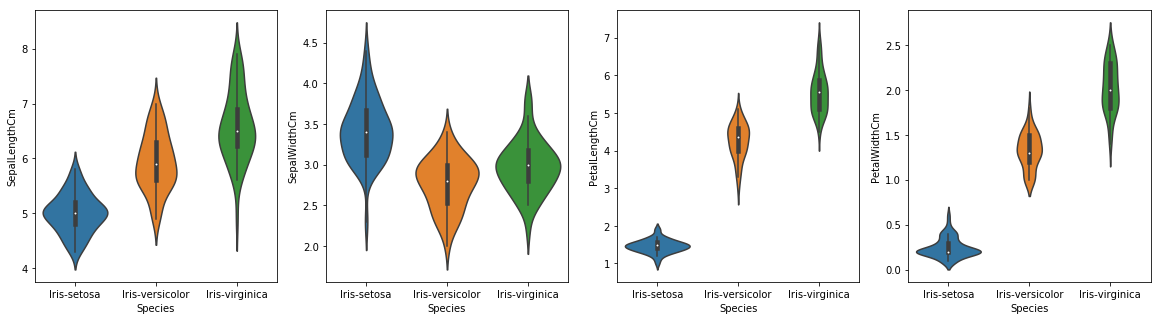

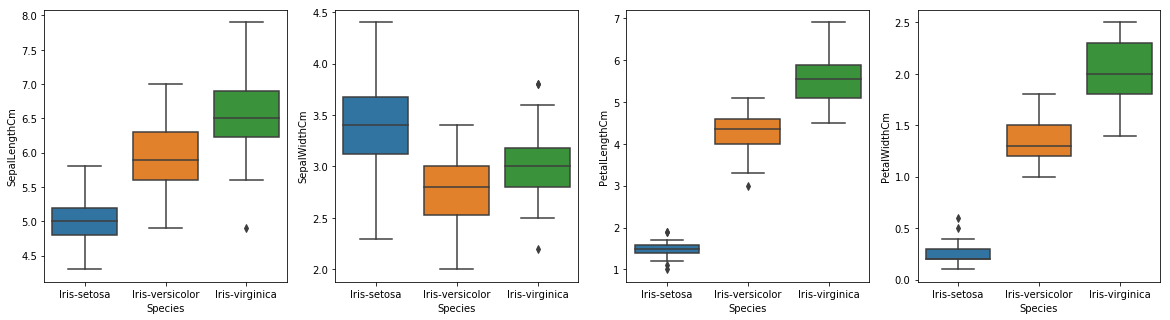

In [61]:
# a similar plot, which display the distribution of the attributes better--- violinplot
plt.figure(figsize=(20,5))
plt.subplot(141)
sns.violinplot(x="Species", y="SepalLengthCm", data=data)
plt.subplot(142)
sns.violinplot(x="Species", y="SepalWidthCm", data=data)
plt.subplot(143)
sns.violinplot(x="Species", y="PetalLengthCm", data=data)
plt.subplot(144)
sns.violinplot(x="Species", y="PetalWidthCm", data=data)

# compare to boxplot

plt.figure(2,figsize=(20,5))
plt.subplot(141)
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
plt.subplot(142)
sns.boxplot(x="Species", y="SepalWidthCm", data=data)
plt.subplot(143)
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.subplot(144)
sns.boxplot(x="Species", y="PetalWidthCm", data=data)

#### They have similar functionality on visualize the target range with respect to each attribute. Chose by your preference! 

In [67]:
# bonus leave a question: how to understand this plot?

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


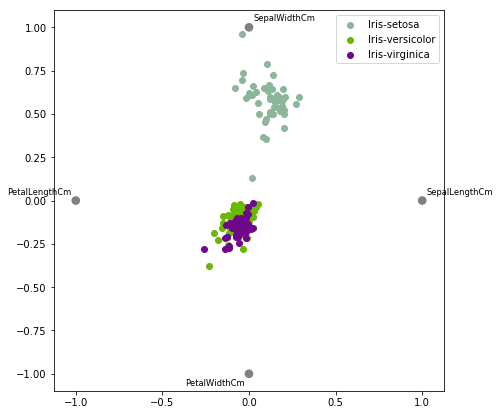

In [68]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(7,7))
radviz(data.drop("Id", axis=1), "Species")